# TMDB Box office prediction EDA

## pipeline
### 1. load in data and import packages
### 2. data cleaning
### 3. visualizing correlation with numerical variables
    histogram and correlation map
    heatmap with numerical variables, budget, popularity, runtime, revenue
### 4. analysis with time variable, release data
    1. barplot of release year
    2. barplot of release day
    3. barplot of release month, count of release month
    4. barplot of release quarter, count of release quarter

In [1]:
#1. load in data and import packages
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#1. load in data and import packages
file = '/Users/Sue/Documents/study2020/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0721wragling_train_t2.csv'
df_train = pd.read_csv(file)
df_train.head(3)

,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,14000000,Comedy,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Metro-Goldwyn-Mayer (MGM),Paramount Pictures,U...",United States of America,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"duringcreditsstinger,hot tub,sequel,time travel","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"Comedy,Drama,Family,Romance",en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,United States of America,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,falling in love,marriage","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,Drama,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Blumhouse Productions,Bold Films,Right of Way ...",United States of America,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"conservatory,drummer,jazz,jazz band,montage,mu...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


# 2  data cleaning
## 1. keep numerical variable and datetime
### budget, runtime, popularity, release_date
## 2. genre
## 3. original_language
## 4. original_title
## 5. poster_path
## 6. production_companies
## 7. production_countries
## 8. spoken_languages
## 9. status
## 10. title
## 11. cast
## 12. crew

## 1. keep numerical variable and datetime

In [3]:
#1. drop columns where budget is 0
#df_train = df_train[df_train['budget'] != 0 ]

## 2. genre

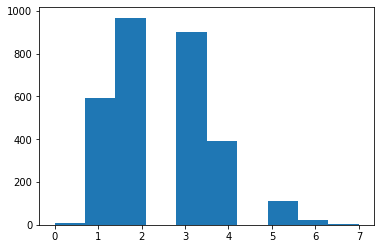

In [4]:
#2. genre
# firstly, check how many genres each movie has
gi = df_train['genres'].str.split(pat = ',')
length = list(0 for i in range(gi.count()))
for i in range(gi.count()):
#    print(type(gi[i]))
    if type(gi[i]) == list :
        length[i]=len(gi[i])
#print(max(length), np.median(length))
plt.hist(length)
plt.show()

From the histogram we observed that most movies has genres and varies from 0~7, median is 2. 
To analysis the impact of genres, will firstly get top 2 genres, and also the number of genres as three new variables to replace the variable of genre.

In [5]:
for i in range(gi.count()):
    if type(gi[i]) == list :
        df_train['genre_length']=len(gi[i])
        if len(gi[i]) >=2:
            df_train['genre_1'] = gi[i][0]
            df_train['genre_2'] = gi[i][1]
        elif len(gi[i]) ==1:
            df_train['genre_1'] = gi[i][0]
            df_train['genre_2'] = 'no genre'               
    else:
        df_train['genre_length']= 0
        df_train['genre_1'] = 'no genre'
        df_train['genre_2'] = 'no genre'
df_train.sample(3)

,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,status,tagline,title,Keywords,cast,crew,revenue,genre_length,genre_1,genre_2
2399,0,"Drama,Thriller",ja,カイジ2 人生奪回ゲーム,1.133760,/ltUkDRbXYqmoebmMePtXwznHFaX.jpg,"Horipro,Kodansha,Nippon Television Network Cor...",Japan,2011-11-05,133.0,...,Released,NaN,Kaiji 2: The Ultimate Gambler,NaN,"[{'cast_id': 1, 'character': 'Kaiji Ito', 'cre...","[{'credit_id': '52fe4a68c3a36847f81cc20f', 'de...",15,5,Action,Adventure
1556,7000000,"Comedy,Crime,Drama",en,Bottle Rocket,6.904831,/iuO10cRKrMfql5yc8YTgdfHt7gR.jpg,"Columbia Pictures Corporation,Gracie Films",United States of America,1996-02-21,91.0,...,Released,"They're not really criminals, but everyone's g...",Bottle Rocket,"brother brother relationship,burglar,escapade,...","[{'cast_id': 1, 'character': 'Anthony Adams', ...","[{'credit_id': '52fe458b9251416c7505a35b', 'de...",560069,5,Action,Adventure
2639,70000000,"Comedy,Drama",en,The Dilemma,7.513067,/z08hb5v5msfD1Pr5eoylXtVtMCE.jpg,"Imagine Entertainment,Spyglass Entertainment,U...",United States of America,2011-01-13,111.0,...,Released,Two best friends. Nothing could come between t...,The Dilemma,"adultery,best friend,cheating on partner,dilem...","[{'cast_id': 4, 'character': 'Nick Brannen', '...","[{'credit_id': '58d402a8c3a368121b0159b8', 'de...",67112664,5,Action,Adventure


## 3. original language

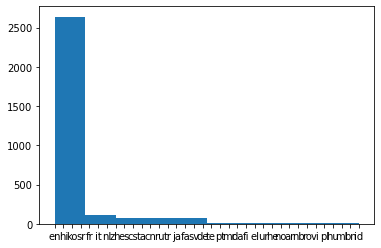

In [6]:
#3. original language
plt.hist(df_train['original_language'])
plt.show()

over 90% original language is english, will define a new variable as en/ no-en

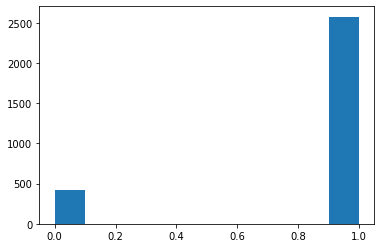

In [7]:
df_train['original_language_en']= [1 if x =='en' else 0 for x in df_train['original_language']]
plt.hist(df_train['original_language_en'])
plt.show()

## 4. original_title, title

In [8]:
#4. original_title, title
diff_title = df_train[df_train['original_title']!=df_train['title']][['original_title','title']]
print(diff_title)

            original_title              title
4                     마린보이         Marine Boy
15                 Šišanje           Skinning
30            Intouchables   The Intouchables
45           La doppia ora    The Double Hour
50    Aanrijding in Moscou    Moscow, Belgium
...                    ...                ...
2963                    恋空        Sky Of Love
2972                   龍虎門  Dragon Tiger Gate
2980       ആക്ഷൻ ഹീറോ ബിജു   Action Hero Biju
2988                    ده                Ten
2996           Vi är bäst!   We Are the Best!

[351 rows x 2 columns]


## 5. poster path

original title is not in unique language, while title is in english translation. to simplify the model building, will keep the 'title' and delete the variable original title.

In [9]:
#5 poster path
# will delete this column for now.
# tagline, title, and Keywords are all about describtion of movie, will keep title and delete Keywords, tagline for now.
# summarize and clean up dataframe
df_train = df_train.drop(['genres','original_language','original_title','poster_path','tagline','Keywords'], axis = 1)
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_length,genre_1,genre_2,original_language_en
2182,70000000,14.116474,"Cheyenne Enterprises,David Foster Productions,...",United States of America,2002-02-15,125.0,"de,en",Released,Hart's War,"[{'cast_id': 19, 'character': 'Col. William A....","[{'credit_id': '52fe438e9251416c75015179', 'de...",32287044,5,Action,Adventure,1
358,75000000,7.970031,"Impact Pictures,Jerry Weintraub Productions,Mo...",United States of America,1998-10-23,99.0,en,Released,Soldier,"[{'cast_id': 1, 'character': 'Todd', 'credit_i...","[{'credit_id': '52fe44f5c3a36847f80b44f7', 'de...",14567883,5,Action,Adventure,1
636,0,2.081712,Metro-Goldwyn-Mayer (MGM),NaN,1981-08-07,107.0,en,Released,"Tarzan, the Ape Man","[{'cast_id': 1, 'character': 'Jane Porter', 'c...","[{'credit_id': '52fe44fac3a368484e041cfb', 'de...",36565280,5,Action,Adventure,1


## 6. production companies

In [10]:
#6. production companies
df_train.count()

budget                  3000
popularity              3000
production_companies    2844
production_countries    2945
release_date            3000
runtime                 3000
spoken_languages        2980
status                  3000
title                   3000
cast                    2987
crew                    2984
revenue                 3000
genre_length            3000
genre_1                 3000
genre_2                 3000
original_language_en    3000
dtype: int64

In [11]:
# production_companies has 5% data missing, will fill those missing values as unkown.
df_train['production_companies'].fillna(value = 'unknown',inplace = True)
df_train.count()

budget                  3000
popularity              3000
production_companies    3000
production_countries    2945
release_date            3000
runtime                 3000
spoken_languages        2980
status                  3000
title                   3000
cast                    2987
crew                    2984
revenue                 3000
genre_length            3000
genre_1                 3000
genre_2                 3000
original_language_en    3000
dtype: int64

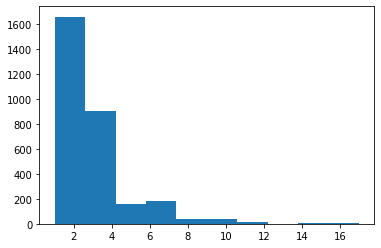

In [12]:
# for each movie, not only one company is involved in production, so will add a new feature to count the number of companies.
comp = df_train['production_companies'].str.split(pat = ',')
length = list(0 for i in range(comp.count()))
#list_company = list([] for i in range(comp.count()))
for i in range(comp.count()):
    if type(comp[i]) == list :
        length[i]=len(comp[i])
#        list_company[i]= comp[i]
#print(max(length), np.median(length))
plt.hist(length)
plt.show()

In [13]:
df_train['num_comp']=length
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_length,genre_1,genre_2,original_language_en,num_comp
2507,2000000,7.659357,The Weinstein Company,United States of America,2005-09-11,120.0,"en,es,ko",Released,Harsh Times,"[{'cast_id': 1, 'character': 'Jim Luther Davis...","[{'credit_id': '52fe4488c3a36847f809b711', 'de...",5967038,5,Action,Adventure,1,1
1420,3000000,1.017103,"Lux Digital Pictures,The Horrorworks",United States of America,2007-05-06,80.0,"en,ru",Released,Night Of The Living Dead 3D,"[{'cast_id': 3, 'character': 'Barb', 'credit_i...","[{'credit_id': '52fe44b0c3a368484e03131b', 'de...",1449945,5,Action,Adventure,1,2
133,65000000,11.739560,"Green Hat Films,Legendary Pictures,Warner Bros.",United States of America,2010-11-04,95.0,"en,es",Released,Due Date,"[{'cast_id': 18, 'character': 'Peter Highman',...","[{'credit_id': '569c1c83c3a36858c6000d63', 'de...",211780824,5,Action,Adventure,1,3


In [14]:
# new feature, weather the production company is in top 30.
list_company = []
for count, ele in enumerate(df_train['production_companies']):
    items = ele.strip().split(',')
 #   print(items)
    list_company+=items
top_companies = [m[0] for m in collections.Counter([i for i in list_company]).most_common(30)]
print(top_companies)

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'unknown', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures', 'Walt Disney Pictures', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists', 'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises', ' The', 'BBC Films', 'Dune Entertainment', 'Working Title Films', 'Fox Searchlight Pictures', 'StudioCanal', 'Lionsgate', 'DreamWorks SKG', 'Fox 2000 Pictures', 'Summit Entertainment', 'Hollywood Pictures', 'Orion Pictures']


In [15]:
for g in top_companies:
    df_train['top_companies'] = df_train['production_companies'].apply(lambda x: 1 if g in x else 0)
df_train.sample(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_length,genre_1,genre_2,original_language_en,num_comp,top_companies
577,0,8.665106,"La Station d'Animation,M6 Films,Mandarin Films...","Canada,France",2017-02-01,86.0,"en,fr",Released,Sahara,"[{'cast_id': 0, 'character': 'Ajar (voice)', '...","[{'credit_id': '5815b1bc9251415c5e00a502', 'de...",7800000,5,Action,Adventure,0,6,0
2962,20000000,16.392712,"Netter Productions,Summit Entertainment",United States of America,2017-03-03,132.0,en,Released,The Shack,"[{'cast_id': 0, 'character': 'Mack Phillips', ...","[{'credit_id': '591ed967c3a368799b03016c', 'de...",57330873,5,Action,Adventure,1,2,0
2288,12823507,2.981184,Non-Stop Productions,Russia,2016-09-29,110.0,ru,Released,The Duelist,"[{'cast_id': 4, 'character': 'Yakovlev', 'cred...","[{'credit_id': '57c558bf9251415141005b77', 'de...",6101904,5,Action,Adventure,0,1,0


## 7. production_countries

In [16]:
#7. production contries
df_train['production_countries'].fillna(value = 'unknown',inplace = True)

In [17]:
# keep two primary production countries, drop column production_companies, production_countries
country = df_train['production_countries'].str.split(pat = ',')
length = list(0 for i in range(country.count()))
for i in range(country.count()):
    if type(country[i]) == list :
        length[i]=len(country[i])
for i in range(country.count()):
    if type(country[i]) == list :
        df_train['country_length']=len(country[i])
        if len(country[i]) >=2:
            df_train['country_1'] = country[i][0]
            df_train['country_2'] = country[i][1]
        elif len(country[i]) ==1:
            df_train['country_1'] = country[i][0]
            df_train['country_2'] = 'no country'               
df_train = df_train.drop(['production_companies','production_countries'],axis = 1)
df_train.sample(3)

,budget,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,genre_length,genre_1,genre_2,original_language_en,num_comp,top_companies,country_length,country_1,country_2
2927,140000000,12.996474,2002-11-17,133.0,"cn,de,en,es,is,it,ko",Released,Die Another Day,"[{'cast_id': 20, 'character': 'James Bond', 'c...","[{'credit_id': '52fe45ff9251416c91045a7f', 'de...",431971116,5,Action,Adventure,1,1,0,1,United States of America,no country
996,15000000,9.285519,2016-07-29,120.0,"de,en,it,ja",Released,Shin Godzilla,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...",77000000,5,Action,Adventure,0,2,0,1,United States of America,no country
2812,2200000,6.313465,2014-06-12,121.0,"en,hu",Released,White God,"[{'cast_id': 1, 'character': 'Lili', 'credit_i...","[{'credit_id': '5378b097c3a3685525003bfe', 'de...",282358,5,Action,Adventure,0,3,0,1,United States of America,no country


## 8. spoken language

In [18]:
#8. spoken languages
#number of spoken languages, and if english is one of them
df_train['spoken_languages'].fillna(value = 'no',inplace = True)
spk = df_train['spoken_languages'].str.split(pat = ',')
length = list(0 for i in range(spk.count()))
for i in range(spk.count()):
    if type(spk[i]) == list and spk[i] != 'no':
        length[i]=len(spk[i])
df_train['num_spoken']=length

In [19]:
df_train['spoken_en'] = df_train['spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

In [20]:
df_train.sample(10)

,budget,popularity,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,...,genre_1,genre_2,original_language_en,num_comp,top_companies,country_length,country_1,country_2,num_spoken,spoken_en
345,0,3.611453,1988-07-08,113.0,en,Released,Arthur 2: On the Rocks,"[{'cast_id': 1, 'character': 'Arthur Bach', 'c...","[{'credit_id': '52fe44edc3a368484e03eaff', 'de...",14681192,...,Action,Adventure,1,1,0,1,United States of America,no country,1,1
455,0,9.128571,2007-08-16,84.0,"en,it",Released,Shrooms,"[{'cast_id': 3, 'character': 'Tara', 'credit_i...","[{'credit_id': '53708f910e0a2647c8014cce', 'de...",4910682,...,Action,Adventure,1,9,0,1,United States of America,no country,2,1
1683,0,0.000308,1985-03-29,105.0,en,Released,The Slugger's Wife,"[{'cast_id': 3, 'character': 'Darryl Palmer', ...","[{'credit_id': '52fe499ac3a368484e13425b', 'de...",1878561,...,Action,Adventure,1,2,0,1,United States of America,no country,1,1
1771,13400000,1.223071,2010-12-29,100.0,ko,Released,The Last Godfather,"[{'cast_id': 1, 'character': 'Don Carini', 'cr...","[{'credit_id': '52fe4814c3a368484e0e8467', 'de...",16700000,...,Action,Adventure,1,1,0,1,United States of America,no country,1,0
1980,10000000,5.872794,2011-09-13,83.0,en,Released,"Jeff, Who Lives at Home","[{'cast_id': 21, 'character': 'Jeff', 'credit_...","[{'credit_id': '52fe485a9251416c91089613', 'de...",4417580,...,Action,Adventure,1,1,0,1,United States of America,no country,1,1
2855,6000,5.283661,1998-09-12,69.0,en,Released,Following,"[{'cast_id': 17, 'character': 'Bill', 'credit_...","[{'credit_id': '52fe44739251416c750352fd', 'de...",48482,...,Action,Adventure,1,2,0,1,United States of America,no country,1,1
1896,35000000,8.337560,2008-03-27,123.0,en,Released,21,"[{'cast_id': 1, 'character': 'Ben Campbell', '...","[{'credit_id': '52fe4490c3a36847f809d381', 'de...",69823199,...,Action,Adventure,1,2,0,1,United States of America,no country,1,1
2785,0,0.625099,2001-04-12,0.0,no,Released,Revelation,"[{'cast_id': 1, 'character': 'Jake Martel', 'c...","[{'credit_id': '52fe4981c3a36847f819d97d', 'de...",10000000,...,Action,Adventure,0,3,0,1,United States of America,no country,1,0
846,20000000,16.010760,2016-12-22,120.0,"en,id",Released,Gold,"[{'cast_id': 3, 'character': 'Kenny Wells', 'c...","[{'credit_id': '589075e392514103e400556f', 'de...",7227038,...,Action,Adventure,1,4,0,1,United States of America,no country,2,1
2935,90000000,10.815520,2004-06-10,93.0,en,Released,The Stepford Wives,"[{'cast_id': 19, 'character': 'Joanna Eberhart...","[{'credit_id': '52fe4541c3a36847f80c3eff', 'de...",102000000,...,Action,Adventure,1,3,0,1,United States of America,no country,1,1


## 9. status

In [21]:
#9. status
df_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [22]:
#delete Rumorsed status
df_train = df_train[df_train['status']!= 'Rumored']
df_train['status'].value_counts()

Released    2996
Name: status, dtype: int64

## 10. title

In [23]:
#10. title
df_train['title'].isnull

<bound method Series.isnull of 0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 2996, dtype: object>

## 11. cast

In [24]:
#11. cast
df_train['cast'][0]
# cast column has cast_id, character, credit_id, gender, id, name, order, profile_path subcolumns. Would like to see how gender affect the revenue

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [25]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [26]:
#create new feature, number of cast genders in a movie , gender 1 = female, gender 2 = male, gender 0 = unknown
list_of_cast_genders = list(df_train['cast'].apply(lambda x: [i['gender'] for i in get_dictionary(x)] if x != {} else []).values)
collections.Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27941), (0, 20325), (1, 13526)]

In [27]:
df_train['genders_0_cast'] =df_train['cast'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_1_cast'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_2_cast'] = df_train['cast'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_cast'] = df_train['cast'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

## 12. crew

In [28]:
#12 crew
# will also anlyze the number of crews and gender of crew
df_train['genders_0_crew'] =df_train['crew'].apply(lambda x: sum([1 for i in get_dictionary(x) if i['gender'] == 0]))
df_train['genders_1_crew'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 1]))
df_train['genders_2_crew'] = df_train['crew'].apply(lambda x:sum([1 for i in get_dictionary(x) if i['gender'] == 2]))
df_train['num_crew'] = df_train['crew'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0)

In [29]:
df_train = df_train[df_train['budget'] != 0]

In [31]:
df_train = df_train.drop(['cast', 'crew'], axis = 1)
df_train.sample(5)

,budget,popularity,release_date,runtime,spoken_languages,status,title,revenue,genre_length,genre_1,...,num_spoken,spoken_en,genders_0_cast,genders_1_cast,genders_2_cast,num_cast,genders_0_crew,genders_1_crew,genders_2_crew,num_crew
46,80000000,16.646029,2006-03-23,91.0,en,Released,Ice Age: The Meltdown,660940780,5,Action,...,1,1,17,7,18,42,7,0,3,10
107,72000000,20.755149,1995-05-24,177.0,"en,fr,gd,la",Released,Braveheart,210000000,5,Action,...,4,1,25,1,29,55,42,1,24,67
2205,6500000,9.785147,2004-01-13,112.0,"en,es,fa,ko,zh",Released,Crash,98410061,5,Action,...,5,1,13,13,26,52,18,7,15,40
311,9500000,8.594980,2012-05-18,168.0,"en,fr",Released,Laurence Anyways,12250,5,Action,...,2,1,7,9,7,23,3,0,5,8
1158,90000000,10.338222,2013-08-07,106.0,en,Released,Percy Jackson: Sea of Monsters,174578751,5,Action,...,1,1,4,7,11,22,15,4,10,29


In [32]:
df_train.to_csv('/Users/Sue/Documents/study2020/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/0928_eda.csv',index = False)